In [6]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Function to add users and friendships to the graph
def add_user(user_id, username):
    G.add_node(user_id, username=username, type="user")

def add_friendship(user1_id, user2_id):
    G.add_edge(user1_id, user2_id)

In [3]:
foodOrigins = ["Failed Experiment", "Leftovers", "Expired food", "not sure"]

Cooking = ["raw", "raw (probably still alive)", "burnt", "insanely burnt", "calcinated", "Probably radioactive"]

Spiciness = [0, 1, 2, 3]

users = [
    (1, "Alice"),
    (2, "Bob"),
    (3, "Charlie"),
    (4, "David"),
    (5, "Eve")
]

friendships = [
    (1, 2),
    (1, 3),
    (2, 4),
    (3, 5),
    (1, 5)
]

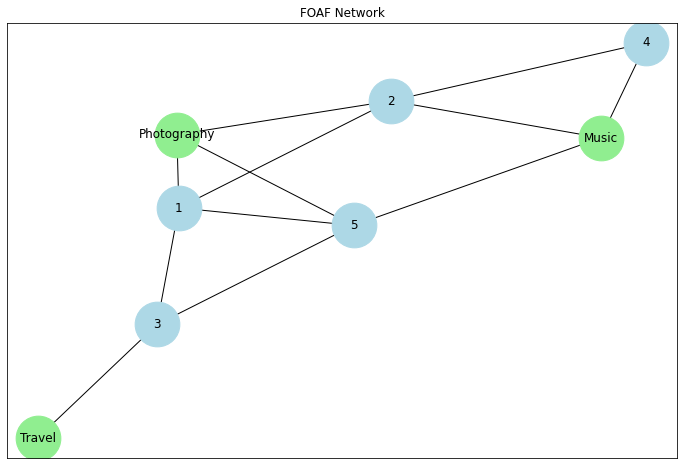

Recommendations for User 1: ['Photography', 2, 3, 5]
Recommendations for User 2: ['Photography', 'Music', 4, 1]
Recommendations for User 3: [1, 5]
Recommendations for User 4: ['Music', 2]
Recommendations for User 5: ['Photography', 3, 1]
Les voisins de 1
{'Photography', 2, 3, 5}


In [4]:
interests = ["Photography", "Music", "Travel"]
# Create an empty graph
G = nx.Graph()



# Add interests as nodes to the graph
for interest in interests:
    G.add_node(interest, type="interest")

# Connect users to their interests (based on your example data)
G.add_edge(1, "Photography")
G.add_edge(2, "Photography")
G.add_edge(2, "Music")
G.add_edge(3, "Travel")
G.add_edge(4, "Music")
G.add_edge(5, "Music")
G.add_edge(5, "Photography")



friendships = [
    (1, 2),
    (1, 3),
    (2, 4),
    (3, 5),
    (1, 5)
]

# Add users and friendships to the graph
for user_id, username in users:
    add_user(user_id, username)

for user1_id, user2_id in friendships:
    add_friendship(user1_id, user2_id)

# Simple recommendation algorithm
def simple_recommendation(user_id):
    recommendations = []
    user_friends = set(G.neighbors(user_id))
    user_interests = set(G.neighbors(user_id))
    for friend in user_friends:
        friend_friends = set(G.neighbors(friend))
        shared_friends = user_friends.intersection(friend_friends)
        if len(shared_friends) > 0 and friend != user_id:  # Skip recommending the user itself
            recommendations.append(friend)
    return recommendations

# Draw the graph
pos = nx.spring_layout(G)
user_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'user']
interest_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'interest']
plt.figure(figsize=(12, 8))  # Set the figure size
nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='lightblue', node_size=2000)
nx.draw_networkx_nodes(G, pos, nodelist=interest_nodes, node_color='lightgreen', node_size=2000)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title("FOAF Network")
plt.show()

# Example usage of the recommendation algorithm
for user_id, _ in users:
    recommendations = simple_recommendation(user_id)
    print(f"Recommendations for User {user_id}: {recommendations}")

print("Les voisins de 1")
print(set(G.neighbors(1)))

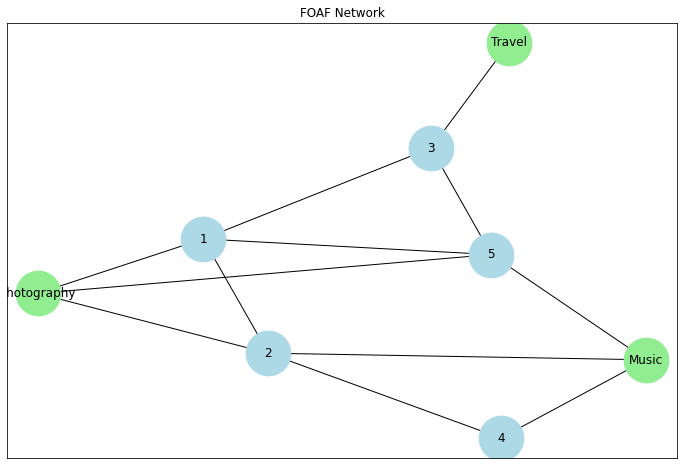

Recommendations for User 1: ['Photography', 2, 3, 5]
Recommendations for User 2: ['Photography', 'Music', 4, 1]
Recommendations for User 3: [1, 5]
Recommendations for User 4: ['Music', 2]
Recommendations for User 5: ['Photography', 3, 1]


In [5]:
G = nx.Graph()

# Function to add users and friendships to the graph
def add_user(user_id, username):
    G.add_node(user_id, username=username, type="user")

def add_friendship(user1_id, user2_id):
    G.add_edge(user1_id, user2_id)

# Add interests as nodes to the graph
interests = ["Photography", "Music", "Travel"]
for interest in interests:
    G.add_node(interest, type="interest")

# Connect users to their interests (based on your example data)
G.add_edge(1, "Photography")
G.add_edge(2, "Photography")
G.add_edge(2, "Music")
G.add_edge(3, "Travel")
G.add_edge(4, "Music")
G.add_edge(5, "Music")
G.add_edge(5, "Photography")

# Example users and friendships
users = [
    (1, "Alice"),
    (2, "Bob"),
    (3, "Charlie"),
    (4, "David"),
    (5, "Eve")
]

friendships = [
    (1, 2),
    (1, 3),
    (2, 4),
    (3, 5),
    (1, 5)
]

# Add users and friendships to the graph
for user_id, username in users:
    add_user(user_id, username)

for user1_id, user2_id in friendships:
    add_friendship(user1_id, user2_id)

# Simple recommendation algorithm
def simple_recommendation(user_id):
    recommendations = []
    user_friends = set(G.neighbors(user_id))
    user_interests = set(G.neighbors(user_id))
    for friend in user_friends:
        friend_friends = set(G.neighbors(friend))
        shared_friends = user_friends.intersection(friend_friends)
        if len(shared_friends) > 0 and friend != user_id:  # Skip recommending the user itself
            recommendations.append(friend)
    return recommendations

# Draw the graph
pos = nx.spring_layout(G)
user_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'user']
interest_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'interest']
plt.figure(figsize=(12, 8))  # Set the figure size
nx.draw_networkx_nodes(G, pos, nodelist=user_nodes, node_color='lightblue', node_size=2000)
nx.draw_networkx_nodes(G, pos, nodelist=interest_nodes, node_color='lightgreen', node_size=2000)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.title("FOAF Network")
plt.show()

# Example usage of the recommendation algorithm
for user_id, _ in users:
    recommendations = simple_recommendation(user_id)
    print(f"Recommendations for User {user_id}: {recommendations}")

In [6]:
g=nx.read_edgelist('data/train.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 210598
Number of edges: 1046136
Average in degree:   4.9675
Average out degree:   4.9675


In [7]:
def calculate_weight(user_id, potential_recommendation_id, G):
    common_friends = len(set(G.neighbors(user_id)).intersection(set(G.neighbors(potential_recommendation_id))))
    shared_interests = len(set(G.neighbors(user_id)).intersection(set(G.neighbors(potential_recommendation_id))))
    return common_friends + shared_interests

def simple_recommendation_with_weights(G):
    recommendations = {}
    for user_id in G.nodes():
        recommendations[user_id] = []
        user_friends = set(G.neighbors(user_id))
        user_interests = set(G.neighbors(user_id))
        for potential_recommendation_id in G.nodes():
            if (
                G.nodes[potential_recommendation_id].get('type') == 'user' and  # Check if the node is a user
                potential_recommendation_id != user_id and 
                potential_recommendation_id not in user_friends
            ):
                potential_recommendation_interests = set(G.neighbors(potential_recommendation_id))
                shared_interests = len(user_interests.intersection(potential_recommendation_interests))
                if shared_interests > 0:  # Only recommend if there are shared interests
                    weight = calculate_weight(user_id, potential_recommendation_id, G)
                    recommendations[user_id].append((potential_recommendation_id, weight))
        recommendations[user_id].sort(key=lambda x: x[1], reverse=True)  # Sort recommendations by weight
    return recommendations

# Example usage
recommendations = simple_recommendation_with_weights(G)
print("Recommendations:")
for user_id, user_recommendations in recommendations.items():
    print(f"User {user_id}:")
    for recommendation, weight in user_recommendations:
        print(f"   - User {recommendation}: Weight = {weight}")


Recommendations:
User Photography:
   - User 3: Weight = 4
   - User 4: Weight = 2
User Music:
   - User 1: Weight = 4
   - User 3: Weight = 2
User Travel:
   - User 1: Weight = 2
   - User 5: Weight = 2
User 1:
   - User 4: Weight = 2
User 2:
   - User 5: Weight = 6
   - User 3: Weight = 2
User 3:
   - User 2: Weight = 2
User 4:
   - User 1: Weight = 2
   - User 5: Weight = 2
User 5:
   - User 2: Weight = 6
   - User 4: Weight = 2


In [8]:
testId = [1,2,3,4]
testDict = {1:[2],
            2:[1,3],
            3:[4],
            4:[2]
}

for i in testDict.keys():
    print(str(i) + " connait " + str(testDict[i]))

1 connait [2]
2 connait [1, 3]
3 connait [4]
4 connait [2]


# MIT CODE

In [7]:
#from recommendation import recommend_by_influence as rif
#from recommendation import recommend_by_number_of_common_friends as rcf
#from recommendation import number_of_common_friends_ratio_map

CHARACTERS = [
    "Nurse",
    "Juliet",
    "Capulet",
    "Tybalt",
    "Friar Laurence",
    "Romeo",
    "Benvolio",
    "Montague",
    "Escalus",
    "Mercutio",
    "Paris"
]

RELATIONSHIPS = [
    ("Nurse", "Juliet"),
    ("Juliet", "Tybalt"),
    ("Juliet", "Friar Laurence"),
    ("Juliet", "Romeo"),
    ("Juliet", "Capulet"),
    ("Capulet", "Tybalt"),
    ("Capulet", "Escalus"),
    ("Capulet", "Paris"),
    ("Romeo", "Friar Laurence"),
    ("Romeo", "Benvolio"),
    ("Romeo", "Montague"),
    ("Romeo", "Mercutio"),
    ("Benvolio", "Montague"),
    ("Montague", "Escalus"),
    ("Escalus", "Mercutio"),
    ("Escalus", "Paris"),
    ("Mercutio", "Paris"),
]


MODALITIES = [
    "Failed Experiment", "Leftovers", "Expired food", "not sure",
    "raw", "raw (probably still alive)", "burnt", "insanely burnt", "calcinated", "Probably radioactive",
    "0", "1", "2", "3"
]


INTERESTS = [
    ("Nurse", "Failed Experiment"),
    ("Nurse", "raw"),
    ("Nurse", "2"),
    ("Juliet", "Leftovers"),
    ("Juliet", "insanely burnt"),
    ("Juliet", "0"),
    ("Capulet", "Expired food"),
    ("Capulet", "Probably radioactive"),
    ("Capulet", "1"),
    ("Tybalt", "not sure"),
    ("Tybalt", "raw (probably still alive)"),
    ("Tybalt", "3"),
    ("Friar Laurence", "Failed Experiment"),
    ("Friar Laurence", "insanely burnt"),
    ("Friar Laurence", "0"),
    ("Romeo", "Leftovers"),
    ("Romeo", "raw"),
    ("Romeo", "3"),
    ("Benvolio", "Expired food"),
    ("Benvolio", "burnt"),
    ("Benvolio", "1"),
    ("Montague", "Failed Experiment"),
    ("Montague", "calcinated"),
    ("Montague", "2"),
    ("Escalus", "Leftovers"),
    ("Escalus", "Probably radioactive"),
    ("Escalus", "1"),
    ("Mercutio", "Failed Experiment"),
    ("Mercutio", "raw (probably still alive)"),
    ("Mercutio", "2"),
    ("Paris", "not sure"),
    ("Paris", "insanely burnt"),
    ("Paris", "3")
]


In [8]:
#Relationship Graph
rj_graph = nx.Graph()
rj_graph.add_nodes_from(CHARACTERS)
rj_graph.add_edges_from(RELATIONSHIPS)

#Interest Graph
i_graph = nx.Graph()
i_graph.add_nodes_from(CHARACTERS)
i_graph.add_edges_from(INTERESTS)

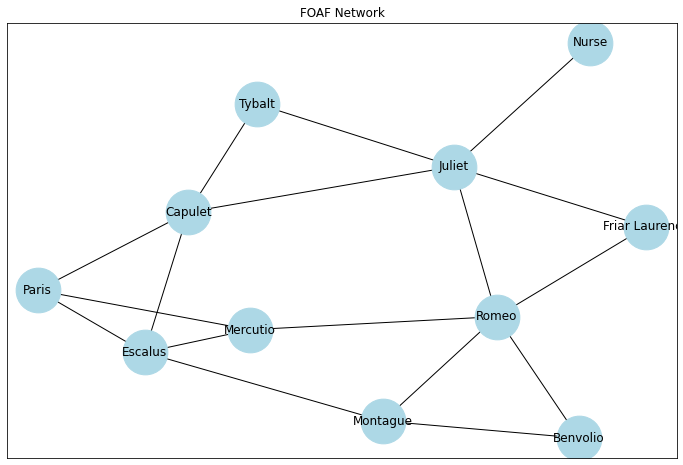

In [9]:
pos = nx.spring_layout(rj_graph)
plt.figure(figsize=(12, 8))  # Set the figure size
nx.draw_networkx_nodes(rj_graph, pos, nodelist=CHARACTERS, node_color='lightblue', node_size=2000)
nx.draw_networkx_edges(rj_graph, pos)
nx.draw_networkx_labels(rj_graph, pos)
plt.title("FOAF Network")
plt.show()

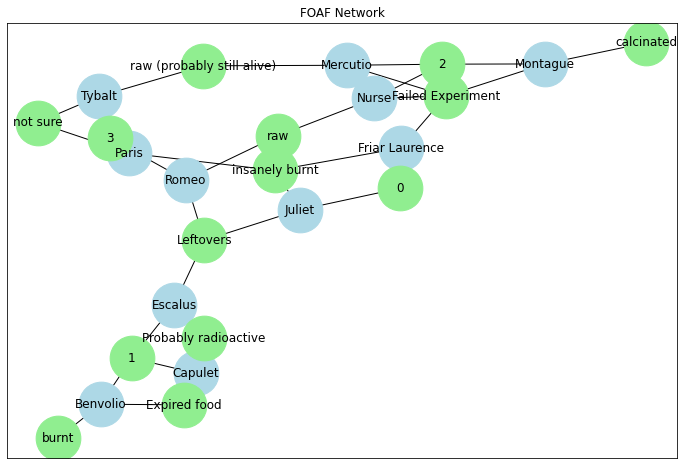

In [10]:
pos = nx.spring_layout(i_graph)
plt.figure(figsize=(12, 8))  # Set the figure size
nx.draw_networkx_nodes(i_graph, pos, nodelist=CHARACTERS, node_color='lightblue', node_size=2000)
nx.draw_networkx_nodes(i_graph, pos, nodelist=MODALITIES, node_color='lightgreen', node_size=2000)
nx.draw_networkx_edges(i_graph, pos)
nx.draw_networkx_labels(i_graph, pos)
plt.title("FOAF Network")
plt.show()

In [11]:
from recommendation import recommend_by_influence as rif
from recommendation import recommend_by_number_of_common_friends as rcf
from recommendation import recommend_by_common_friends_interest as rfi

from recommendation import number_of_common_friends_map # number of common friends
from recommendation import number_of_common_interest_map # number of common interest


def friends_recommandation_algorithm(graph, interest_graph, user):
    """Return the final list of recommanded user based on the mean result of 
    - The rif algorithm.
    - The rcf algorithm.
    - The rfi algorithm.
    The function also returns the number of common friend and the number of
    common interest shared with the recommanded users
    """
    
    rcf_map = number_of_common_friends_map(graph, user)
    rfi_map = number_of_common_interest_map(graph, interest_graph, user)
    
    rcf_result = rcf(graph, user) # nb like de toi
    rif_result = rif(graph, user) # nb like tout court
    rfi_result = rfi(graph, interest_graph, user) # nbinteret 
    
    print(rcf_result)
    print(rif_result)
    print(rfi_result)
    
    all_result = [rcf_result, rif_result, rfi_result]
    
    moyennes = {x: sum(i for l in all_result for i, y in enumerate(l) if y == x) / len(all_result) for x in set().union(*all_result)}
    
    return sorted(moyennes, key=moyennes.get), rcf_map, rfi_map
    
    
    

In [12]:
friends_recommandation_algorithm(rj_graph, i_graph, "Escalus")

['Benvolio', 'Tybalt', 'Romeo', 'Juliet']
['Romeo', 'Benvolio', 'Juliet', 'Tybalt']
['Benvolio', 'Juliet', 'Romeo', 'Tybalt']


(['Benvolio', 'Romeo', 'Juliet', 'Tybalt'],
 {'Benvolio': 1, 'Juliet': 1, 'Romeo': 2, 'Tybalt': 1},
 {'Benvolio': 2, 'Juliet': 2, 'Romeo': 2, 'Tybalt': 1})

In [ ]:
(2+4+6+5)/4

((2+4+6)/3) +5 /2

In [17]:
val = (2+4+6+5)/4

val1 = (2+4+6)/3

val2 = (val1 + 5)/2

print(val)
print(val2)

4.25
4.5


## Fin de l'algorithme

### Début de l'algorithme de recommandation des posts

In [ ]:
ALGORITHMS = ["recommend_by_number_of_common_friends", "recommend_by_influence"]


def algorithm_difference(graph, nodes, results_filename):
    """Identify if the algorithm results are different."""
    same = 0
    different = 0

    #rcfValues = rcf(graph, node)    

    with open(results_filename, "w") as file:
        for node in nodes:
            print(node)
            #print(rif(graph, node))
            #print(number_of_common_friends_map(graph, node))
            #print(rcf(graph, node))
            print(number_of_common_friends_map(graph, node))
            #print(influence_map(graph, node))

            if rcf(graph, node) == rif(graph, node):
                same += 1
                file.write("Same\n")
            else:
                different += 1
                file.write("Different\n")
        

        file.write("\n")
        file.write(f"Same: {same}\n")
        file.write(f"Different: {different}\n")


def average_ranking(user1, user2, user1_recommendations, user2_recommendations):
    """Return the average ranking of two users from their recommendations."""

    if user1 in user2_recommendations and user2 in user1_recommendations:
        user1_rank = user2_recommendations.index(user1) + 1
        user2_rank = user1_recommendations.index(user2) + 1
        return (user1_rank + user2_rank) / 2

    return None


def get_user_recommendations(graph, user, algorithm):
    """Return user recommendations based on algorithm."""

    if algorithm == ALGORITHMS[0]:
        return rcf(graph, user)

    return rif(graph, user)


def algorithms_average(graph, user1, user2):
    """Return recommendation algorithm average scores."""

    common_average = 0
    influence_average = 0
    for algorithm in ALGORITHMS:
        user1_recommendations = get_user_recommendations(graph, user1, algorithm)
        user2_recommendations = get_user_recommendations(graph, user2, algorithm)

        average = average_ranking(
            user1, user2, user1_recommendations, user2_recommendations
        )
        #print(user1)
        #print(user2)
        #print(user1_recommendations)
        #print(user2_recommendations)
        #print(average)
        if average is None:
            return None

        if algorithm == ALGORITHMS[0]:
            common_average = average
        else:
            influence_average = average

    return {ALGORITHMS[0]: common_average, ALGORITHMS[1]: influence_average}


def compare_algorithms(graph, edges):
    """Compare algorithms and return the better one with average performace for each."""

    edge = random.choice(edges)
    
    user1 = edge[0]
    user2 = edge[1]
    graph.remove_edge(user1, user2)

    average_results = algorithms_average(graph, user1, user2)
    graph.add_edge(user1, user2)

    better_algorithm = None
    if not average_results:
        return better_algorithm

    common_friends_average = average_results["recommend_by_number_of_common_friends"]
    influence_average = average_results["recommend_by_influence"]

    if common_friends_average < influence_average:
        better_algorithm = ALGORITHMS[0]

    if influence_average < common_friends_average:
        better_algorithm = ALGORITHMS[1]

    return {
        "better_algorithm": better_algorithm,
        "common_friends_average": common_friends_average,
        "influence_average": influence_average,
    }


def algorithm_analysis(graph, edges, results_filename):
    """Generate a report on the results of both algorithms."""
    common_friends_algorithm = 0
    influence_algorithm = 0
    neither_algorithm = 0

    with open(results_filename, "w") as file:
        for _ in range(1, 101):
            result = compare_algorithms(graph, edges)
            if result is None:
                neither_algorithm += 1
                continue

            file.write(
                f"Average rank common friends algorithm: {result['common_friends_average']}\n"
            )
            file.write(
                f"Average rank influence algorithm: {result['influence_average']}\n"
            )

            if result["better_algorithm"] == ALGORITHMS[0]:
                common_friends_algorithm += 1
                file.write(f"Number of common friends algorithm is better\n")
            if result["better_algorithm"] == ALGORITHMS[1]:
                influence_algorithm += 1
                file.write(f"Influence algorithm is better\n")
            if result["better_algorithm"] is None:
                neither_algorithm += 1
                file.write(f"None is better\n")
            file.write("\n")

        file.write(f"Number of common friends algorithm: {common_friends_algorithm}\n")
        file.write(f"Influence algorithm: {influence_algorithm}\n")
        file.write(f"Neutral: {neither_algorithm}\n")


if __name__ == "__main__":
    rj_graph = nx.Graph()
    rj_graph.add_nodes_from(CHARACTERS)
    rj_graph.add_edges_from(RELATIONSHIPS)

    algorithm_difference(rj_graph, CHARACTERS, "results/rj_algorithm_diff.txt")
    algorithm_analysis(rj_graph, RELATIONSHIPS, "results/rj_algorithm_analysis.txt")

In [ ]:
# Tests
import unittest

from recommendation import (
    common_friends,
    friends,
    friends_of_friends,
    influence_map,
    number_map_to_sorted_list,
    number_of_common_friends_map,
    recommend_by_influence,
    recommend_by_number_of_common_friends as rcf,
)

NODES = ["A", "B", "C", "D", "E", "F", "G"]

EDGES = [
    ("A", "B"),
    ("A", "G"),
    ("B", "C"),
    ("C", "D"),
    ("C", "E"),
    ("E", "D"),
    ("E", "F"),
    ("E", "G"),
]


class BaseTestCase(unittest.TestCase):
    def setUp(self):
        self.graph = nx.Graph()
        self.graph.add_nodes_from(NODES)
        self.graph.add_edges_from(EDGES)

    def test_common_friends_map(self):
        """Test if the correct common friends map is returned"""
        test_data = [
            {"input": "A", "output": {"C": 1, "E": 1}},
            {"input": "B", "output": {"D": 1, "G": 1, "E": 1}},
            {"input": "C", "output": {"G": 1, "F": 1, "A": 1}},
            {"input": "D", "output": {"G": 1, "F": 1, "B": 1}},
            {"input": "E", "output": {"A": 1, "B": 1}},
        ]
        for data in test_data:
            result = number_of_common_friends_map(self.graph, data["input"])
            self.assertEqual(result, data["output"])

    def test_common_friends(self):
        """ "Test if function returns correct common friends"""
        # Because the possible pairs out of the graph are many I will only test 3
        test_data = [
            {"input": ["B", "E"], "output": {"C"}},
            {"input": ["B", "G"], "output": {"A"}},
            {"input": ["D", "F"], "output": {"E"}},
        ]
        for data in test_data:
            result = common_friends(self.graph, *data["input"])
            self.assertEqual(result, data["output"])

    def test_friends_of_friends(self):
        """ "Test if the correct friends of friends are returned"""
        test_data = [
            {"input": "A", "output": {"C", "E"}},
            {"input": "B", "output": {"D", "E", "G"}},
            {"input": "C", "output": {"A", "G", "F"}},
            {"input": "D", "output": {"B", "G", "F"}},
            {"input": "E", "output": {"A", "B"}},
            {"input": "F", "output": {"C", "D", "G"}},
        ]
        for data in test_data:
            result = friends_of_friends(self.graph, data["input"])
            self.assertEqual(result, data["output"])

    def test_friends(self):
        """Test whether the friends function returns the correct output"""
        test_data = [
            {"input": "A", "output": {"B", "G"}},
            {"input": "B", "output": {"A", "C"}},
            {"input": "C", "output": {"B", "D", "E"}},
            {"input": "D", "output": {"C", "E"}},
            {"input": "E", "output": {"G", "F", "C", "D"}},
            {"input": "F", "output": {"E"}},
        ]
        for data in test_data:
            result = friends(self.graph, data["input"])
            self.assertEqual(result, data["output"])

    def test_influence_map(self):
        """ "Test influence map function is returning correct results"""
        self.assertEqual(influence_map(self.graph, "A"), {"E": 0.5, "C": 0.5})
        self.assertEqual(
            influence_map(self.graph, "B"), {"G": 0.5, "E": 1 / 3, "D": 1 / 3}
        )

    def test_influence_recommendation(self):
        """ "Test influence recommendation"""
        self.assertEqual(recommend_by_influence(self.graph, "A"), ["C", "E"])
        self.assertEqual(recommend_by_influence(self.graph, "B"), ["G", "D", "E"])

    def test_sort_map_to_list(self):
        """Test that the function sorts a dictionary and returns a list"""
        self.assertEqual(number_map_to_sorted_list({"A": 2, "H": 3}), ["H", "A"])

    def test_common_friend_recommendation(self):
        """Test common friend recommendation"""
        self.assertEqual(rcf(self.graph, "A"), ["C", "E"])
        self.assertEqual(rcf(self.graph, "E"), ["A", "B"])

In [ ]:
np.round(2.345556, 1)